In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
import pandas as pd

In [72]:
path="/content/drive/MyDrive/AlmaBetter/Python for Data Science/Introduction to Data Visualization/Data/Copy of pp-2018.csv"

In [73]:
df=pd.read_csv(path,names = ["TID","Price","Sale Date", "Postcode",
                            "Property Type","New Build","Tenure","PAON","SAON","Street","Locality","Town/City","District","County","PPD Category","Record Status"],
                             parse_dates= ["Sale Date"])

In [74]:
df=df.copy()

In [75]:
df.head()

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A


In [76]:
df.shape

(1024432, 16)

* Next we will filter the data to get all the transaction for a particular year and month ( say July 2018 for example). We will only keep transactions of type "A" (Additions) in the data frame and get rid of Changes and Deletions. And for the sake of simplicity we will also remove transactions for property type "O" (Other) and focus only on Detached ("D"), Semi Detached ("S"), Flats ("F") and Terraced ("T") houses.

In [77]:
# Keeping the transactions type "A" in record status column and removing the property type "O" in property type column 
df= df.loc[df['Record Status']=="A"]
df=df.loc[df['Property Type'] != "O"]

# Select transactions date for year 2018
df=df.loc[df["Sale Date"].dt.year==2018]

In [78]:
df.head()

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A


In [79]:
df.shape

(959003, 16)

## First objective : Obtain the trend of sales volume across months

In [80]:
from datetime import datetime

#matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
# Creating a variable month 
df["Month"] = df["Sale Date"].apply(lambda x: x.strftime("%Y-%m-%d")[:7])

In [82]:
df.head()

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status,Month
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A,2018-01


In [83]:
df.tail()

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status,Month
1024427,{80E1AA98-9F64-7BF8-E053-6C04A8C00BF2},382500,2018-12-10,BN22 0NF,D,N,F,17,NaN,MEADOWS ROAD,NaN,EASTBOURNE,WEALDEN,EAST SUSSEX,A,A,2018-12
1024428,{80E1AA98-9F67-7BF8-E053-6C04A8C00BF2},394000,2018-12-20,BN16 2QE,D,N,F,14,NaN,HARSFOLD ROAD,RUSTINGTON,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A,2018-12
1024429,{80E1AA98-9F69-7BF8-E053-6C04A8C00BF2},350000,2018-12-14,RH12 2AG,S,N,F,98,NaN,COOTES AVENUE,NaN,HORSHAM,HORSHAM,WEST SUSSEX,A,A,2018-12
1024430,{80E1AA98-9F6A-7BF8-E053-6C04A8C00BF2},346000,2018-12-07,RH10 3AP,S,N,F,9,NaN,DONNE CLOSE,NaN,CRAWLEY,CRAWLEY,WEST SUSSEX,A,A,2018-12
1024431,{80E1AA98-9F6B-7BF8-E053-6C04A8C00BF2},348000,2018-12-11,BN13 3DY,D,N,F,21,NaN,ELLIS AVENUE,NaN,WORTHING,WORTHING,WEST SUSSEX,A,A,2018-12


In [84]:
monthly_sales_vol = df["Month"].value_counts()

In [85]:
monthly_sales_vol.head()

2018-08    95382
2018-11    92427
2018-06    90178
2018-10    86892
2018-07    83082
Name: Month, dtype: int64

In [86]:
monthly_sales_vol.sort_index(inplace=True)

In [87]:
monthly_sales_vol

2018-01    65004
2018-02    66959
2018-03    78070
2018-04    67094
2018-05    76325
2018-06    90178
2018-07    83082
2018-08    95382
2018-09    77836
2018-10    86892
2018-11    92427
2018-12    79754
Name: Month, dtype: int64

In [88]:
# another method
df.groupby("Month")["TID"].count().reset_index().rename(columns={"TID" : "Monthly Sales"})

,Month,Monthly Sales
0,2018-01,65004
1,2018-02,66959
2,2018-03,78070
3,2018-04,67094
4,2018-05,76325
5,2018-06,90178
6,2018-07,83082
7,2018-08,95382
8,2018-09,77836
9,2018-10,86892


Text(0, 0.5, 'Number of sales')

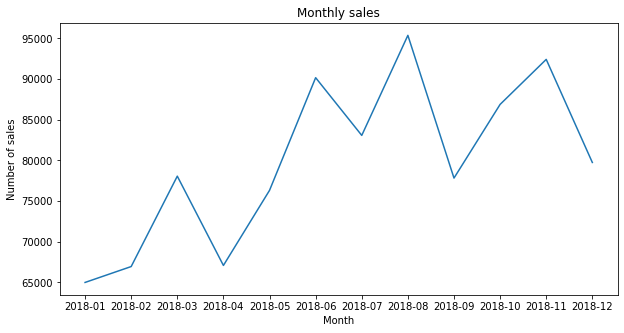

In [89]:
# Setting the plot size
plt.rcParams["figure.figsize"]=(10,5)

# Creating plot
plt.plot(monthly_sales_vol)

# Labelling the plot
plt.title("Monthly sales")
plt.xlabel("Month")
plt.ylabel("Number of sales")

Text(0, 0.5, 'Number of sales')

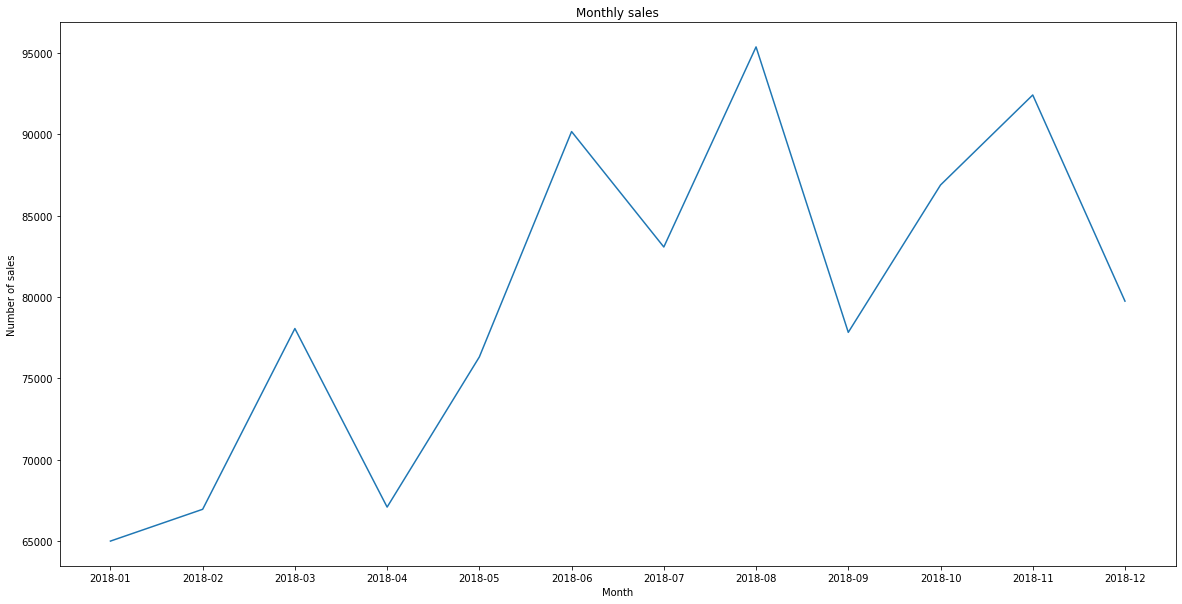

In [90]:
# Setting a different plot size than the above
plt.rcParams["figure.figsize"]=(20,10)

# Creating plot
plt.plot(monthly_sales_vol)

# Labelling the plot
plt.title("Monthly sales")
plt.xlabel("Month")
plt.ylabel("Number of sales")

## Second objective :  Observe the daily sales volume in the month of July 2018

In [91]:
# Extracting the dates for the month of july
july_df = df[df["Sale Date"].dt.month==7]
# shape of july_df
print(july_df.shape)


# Getting values counts for july_df
daily_sales_vol= july_df["Sale Date"].value_counts()

(83082, 17)


In [92]:
daily_sales_vol

2018-07-27    11145
2018-07-20     8802
2018-07-06     8400
2018-07-13     6561
2018-07-31     5047
2018-07-12     3568
2018-07-30     3429
2018-07-26     2965
2018-07-02     2931
2018-07-16     2883
2018-07-23     2742
2018-07-25     2710
2018-07-19     2571
2018-07-18     2438
2018-07-05     2358
2018-07-09     2259
2018-07-11     2165
2018-07-24     2116
2018-07-04     2064
2018-07-10     1985
2018-07-17     1933
2018-07-03     1828
2018-07-28       31
2018-07-14       25
2018-07-29       25
2018-07-21       21
2018-07-15       20
2018-07-01       18
2018-07-07       18
2018-07-22       13
2018-07-08       11
Name: Sale Date, dtype: int64

In [93]:
daily_sales_vol.sort_index(inplace= True)

In [94]:
daily_sales_vol

2018-07-01       18
2018-07-02     2931
2018-07-03     1828
2018-07-04     2064
2018-07-05     2358
2018-07-06     8400
2018-07-07       18
2018-07-08       11
2018-07-09     2259
2018-07-10     1985
2018-07-11     2165
2018-07-12     3568
2018-07-13     6561
2018-07-14       25
2018-07-15       20
2018-07-16     2883
2018-07-17     1933
2018-07-18     2438
2018-07-19     2571
2018-07-20     8802
2018-07-21       21
2018-07-22       13
2018-07-23     2742
2018-07-24     2116
2018-07-25     2710
2018-07-26     2965
2018-07-27    11145
2018-07-28       31
2018-07-29       25
2018-07-30     3429
2018-07-31     5047
Name: Sale Date, dtype: int64

### Creating a line plot

Text(0, 0.5, 'No. of Sales')

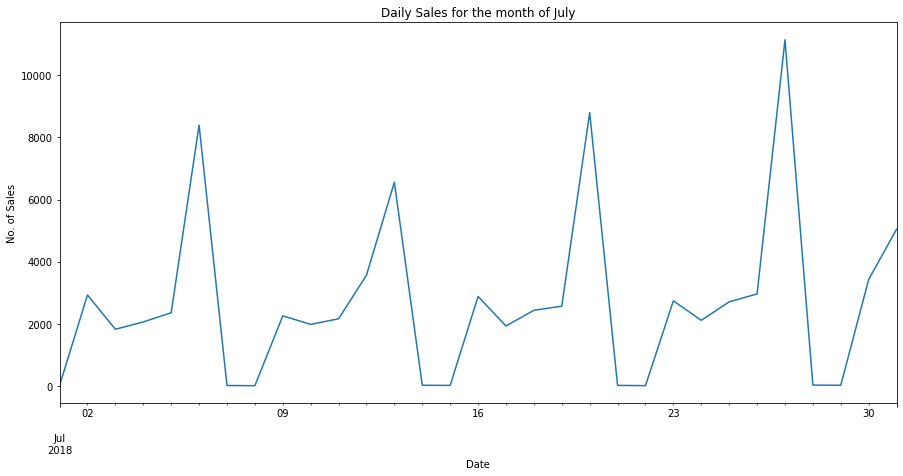

In [95]:
# Setting another plot size
plt.rcParams["figure.figsize"]=(15,7)


# Plotting daily sales for the month of july by using .plot function from pandas
daily_sales_vol.plot()

# labelling using matplotlib
plt.title("Daily Sales for the month of July")
plt.xlabel("Date")
plt.ylabel("No. of Sales")

## Third Objective :  Comparing the daily sales volume of different property types in July

#### Creating multiple lines in the same figure

In [96]:
july_df.groupby(["Sale Date","Property Type"])["TID"].count()

Sale Date   Property Type
2018-07-01  D                   4
            F                   2
            S                   7
            T                   5
2018-07-02  D                 705
                             ... 
2018-07-30  T                 976
2018-07-31  D                1316
            F                1014
            S                1353
            T                1364
Name: TID, Length: 124, dtype: int64

In [97]:
# unstacking the data for better understanding
daily_prices_july=july_df.groupby(["Sale Date","Property Type"])["TID"].count().unstack()

In [98]:
daily_prices_july

Property Type,D,F,S,T
Sale Date,,,,
2018-07-01,4,2,7,5
2018-07-02,705,564,782,880
2018-07-03,443,426,436,523
2018-07-04,529,401,528,606
2018-07-05,623,453,614,668
2018-07-06,1955,1662,2422,2361
2018-07-07,7,6,2,3
2018-07-08,2,4,1,4
2018-07-09,498,447,638,676


In [99]:
list(daily_prices.columns)

['D', 'F', 'S', 'T']

Text(0, 0.5, 'Number of sales')

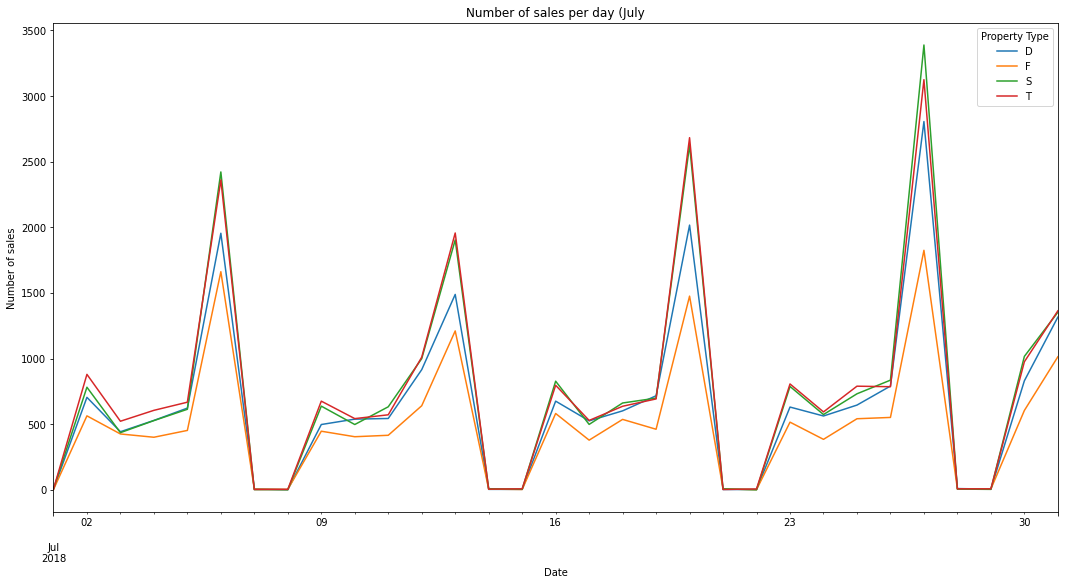

In [100]:
# Setting a different plot size
plt.rcParams["figure.figsize"]=(18,9)

# plotting for daily_prices
daily_prices_july.plot()

# Setting labels

plt.title("Number of sales per day (July")
plt.xlabel("Date")
plt.ylabel("Number of sales")

### Creating a bar plot

* A bar chart is really helpful when we want to see for example the total sales volume by different Property types. 
* To check how a particular variable varies across different categories/groups of another variable we use a Bar plot

* To plot a horizontal bar chart, we set the argument kind='barh'. The sort_values() function sorts the values in ascending order by default.

## Fourth Objective :  Draw comparison among different property types in terms of sales

#### Number of residential property transactions in Aug 2018 by property type

In [101]:
# Getting the data for the month of august
aug_df=df[df["Sale Date"].dt.month==8]

In [102]:
sales_by_type=aug_df["Property Type"].value_counts()

In [103]:
sales_by_type

T    26989
S    26820
D    23614
F    17959
Name: Property Type, dtype: int64

Text(0, 0.5, 'Number of sales')

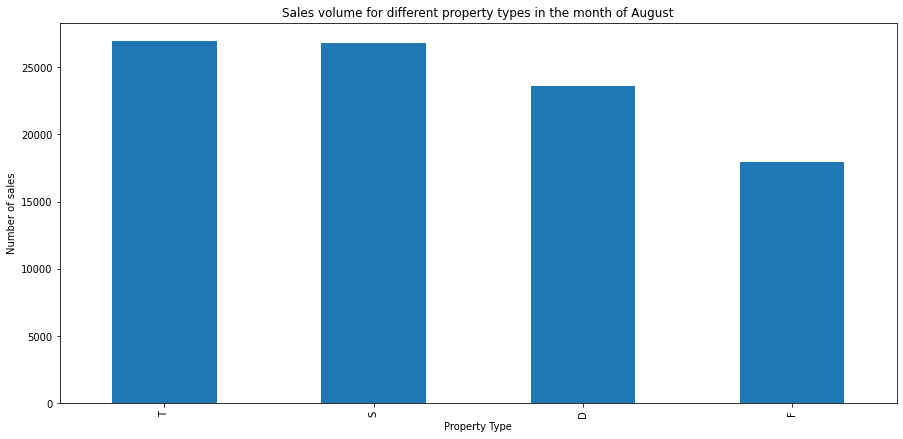

In [104]:
# Setting a figure size
plt.rcParams["figure.figsize"]=(15,7)
# plotting a bar chart
sales_by_type.plot(kind="bar")

# Setting the labels
plt.title("Sales volume for different property types in the month of August")
plt.xlabel("Property Type")
plt.ylabel("Number of sales")


## Fourth Objective : 2.) Average house prices for different property types in July

### Using an Axes instance from Matplotlib

In [105]:
avg_prices_per_ptype = july_df.groupby(["Property Type"])["Price"].mean()

In [106]:
avg_prices_per_ptype

Property Type
D    420870.312359
F    306578.147507
S    260353.586613
T    248855.367203
Name: Price, dtype: float64

Text(0, 0.5, 'Average price')

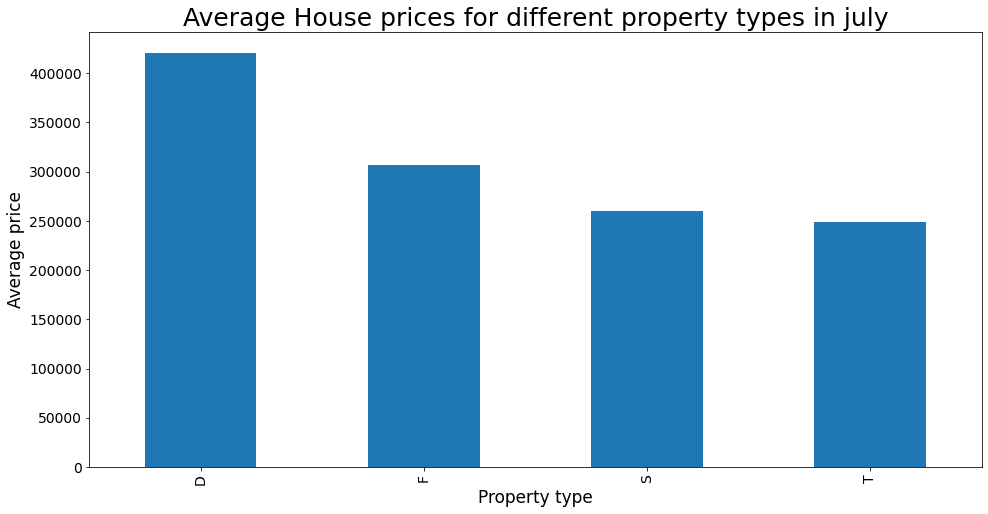

In [107]:
# Creating the figure object
ax=avg_prices_per_ptype.plot.bar(figsize=(16,8),fontsize=14)

# Setting the main labels
ax.set_title("Average House prices for different property types in july",fontsize=25)


# Setting x & y labels
ax.set_xlabel("Property type",fontsize=17)
ax.set_ylabel("Average price",fontsize=17)


## Box plot

* Also called as **box and whisker plot**, is a way of showing the distribution of data in a five-number summary.

* Below we will create a box plot which shows the price distribution for all the four different property types.

## Fifth Objective : Obtain the average house price distribution for different property types

In [108]:
july_df.head()

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status,Month
835,{79A74E21-D135-1289-E053-6B04A8C01627},84000,2018-07-20,OL9 8LS,T,N,L,6,NaN,WHITEGATE LANE,CHADDERTON,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A,2018-07
1044,{773788C2-6D59-2CE4-E053-6C04A8C05E57},228000,2018-07-27,EX16 6AE,D,N,F,11,NaN,MERCERS CLOSE,NaN,TIVERTON,MID DEVON,DEVON,A,A,2018-07
1055,{773788C2-6D60-2CE4-E053-6C04A8C05E57},330000,2018-07-30,EX16 7BL,T,N,F,HOLLY TREE BARN,NaN,CHAINS ROAD,SAMPFORD PEVERELL,TIVERTON,MID DEVON,DEVON,A,A,2018-07
1123,{79A74E21-B602-1289-E053-6B04A8C01627},140000,2018-07-25,OL11 4DD,S,N,L,24,NaN,LINKS VIEW,NaN,ROCHDALE,ROCHDALE,GREATER MANCHESTER,A,A,2018-07
1214,{79A74E21-BC74-1289-E053-6B04A8C01627},375000,2018-07-26,PR3 0ZL,D,N,F,THE COTTAGE,NaN,WEST END,GREAT ECCLESTON,PRESTON,WYRE,LANCASHIRE,A,A,2018-07


In [109]:
avg_price_july_df=july_df.groupby(["Sale Date","Property Type"])["Price"].mean().unstack()

In [110]:
avg_price_july_df

Property Type,D,F,S,T
Sale Date,,,,
2018-07-01,540000.000000,109000.000000,172571.428571,217400.000000
2018-07-02,445515.668085,350084.714539,270838.773657,255916.592045
2018-07-03,447700.440181,373247.507042,247046.855505,269273.124283
2018-07-04,438009.792060,334057.576060,280296.412879,242835.457096
2018-07-05,458506.836276,333304.015453,269661.234528,245529.871257
2018-07-06,388179.344246,280558.135379,248347.932700,223573.152478
2018-07-07,383420.714286,267990.833333,157500.000000,490333.333333
2018-07-08,213500.000000,147123.750000,245000.000000,116250.000000
2018-07-09,401749.847390,301908.429530,265197.501567,291172.751479


Text(0, 0.5, 'Average House Price')

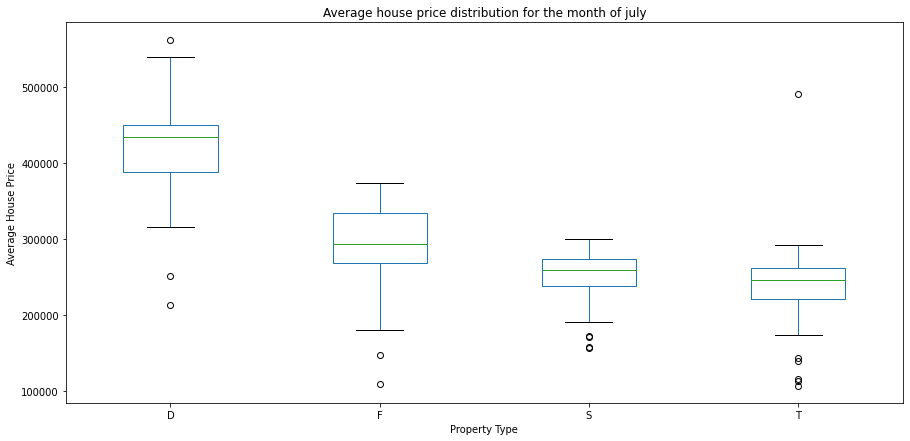

In [111]:
# Setting figure size
plt.rcParams["figure.figsize"]=(15,7)
# Plotting a box plot 
avg_price_july_df.plot(kind="box")

# Setting main label
plt.title("Average house price distribution for the month of july")

# Setting x & y labels
plt.xlabel("Property Type")
plt.ylabel("Average House Price")


Whiskers are set at 1.5 * IQR ( Q3 - Q1)

# Exploring Seaborn

Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.

## Speed Dating Dataset

In [120]:
path=("/content/drive/MyDrive/AlmaBetter/Python for Data Science/Introduction to Data Visualization/Data/Copy of Speed Dating Data.csv")

In [123]:
df2=pd.read_csv(path,encoding="unicode_escape")

In [125]:
df2=df2.copy()

In [126]:
df2.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [127]:
df2.columns.values

array(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round',
       'position', 'positin1', 'order', 'partner', 'pid', 'match',
       'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin',
       'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1',
       'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
       'shar2_1', 'attr3_

# Histogram

In [128]:
import numpy as np

In [129]:
age=df2[~df2["age"].isna()]["age"]

Text(0, 0.5, 'Frequqncy')

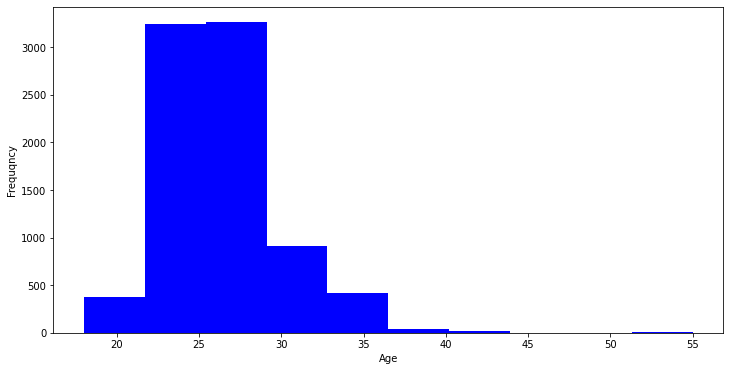

In [132]:
# Setting the figure size
plt.rcParams["figure.figsize"]=(12,6)

# plotting using matplotlib
plt.hist(age.values,color="blue")
plt.xlabel("Age")
plt.ylabel("Frequqncy")


In [133]:
# importing seaborn 
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


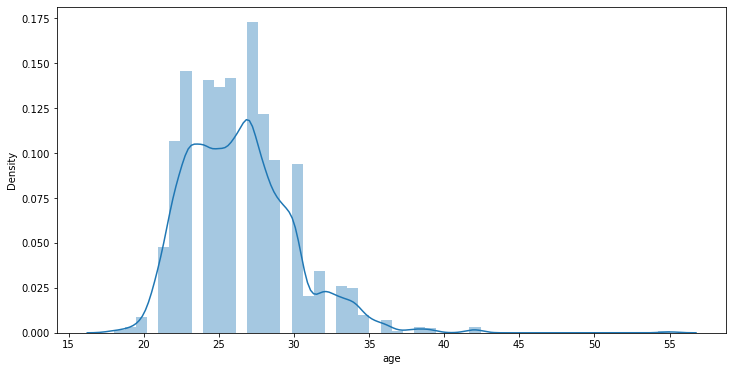

In [134]:
sns.distplot(age,hist=True)

# Understanding correlation

#### Positive Correlation

In [135]:
# Positively correlated data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [2, 3, 4, 6, 6, 7, 8, 9, 10, 11]

In [137]:
positive_df=pd.DataFrame(data={"x":x,"y":y})

In [138]:
positive_df

,x,y
0,1,2
1,2,3
2,3,4
3,4,6
4,5,6
5,6,7
6,7,8
7,8,9
8,9,10
9,10,11


Text(0.5, 1.0, 'Positive correlation')

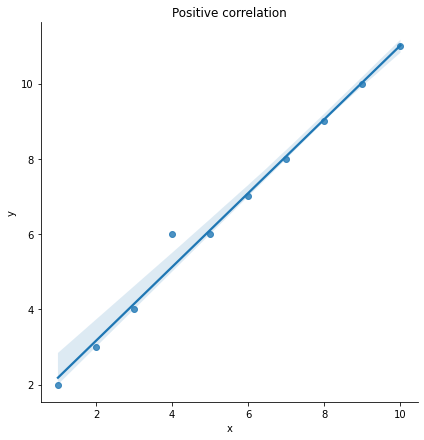

In [146]:
sns.lmplot(x="x",y="y",data=positive_df,height=6,aspect=1)
plt.title("Positive correlation")

In [158]:
positive_df.corr()

,x,y
x,1.000000,0.994558
y,0.994558,1.000000


#### Negative Correlation

In [147]:
# Negatively correlated data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [11, 10, 9, 8, 7, 6, 6, 4, 3, 2]

In [148]:
negative_df=pd.DataFrame(data={"x":x,"y":y})

In [149]:
negative_df

,x,y
0,1,11
1,2,10
2,3,9
3,4,8
4,5,7
5,6,6
6,7,6
7,8,4
8,9,3
9,10,2


Text(0.5, 1.0, 'Negative correlation')

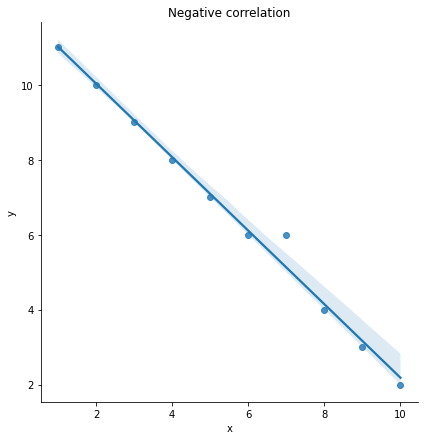

In [151]:
sns.lmplot(x="x",y="y",data=negative_df,height=6,aspect=1)
plt.title("Negative correlation")

In [159]:
negative_df.corr()

,x,y
x,1.000000,-0.994558
y,-0.994558,1.000000


#### Zero Correlation

In [154]:
# Zero correlation
x = [1, 2, 1, 2]
y = [1, 2, 2, 1]

In [155]:
zero_df=pd.DataFrame(data={"x":x,"y":y})

In [156]:
zero_df

,x,y
0,1,1
1,2,2
2,1,2
3,2,1


Text(0.5, 1.0, 'Zero correlation')

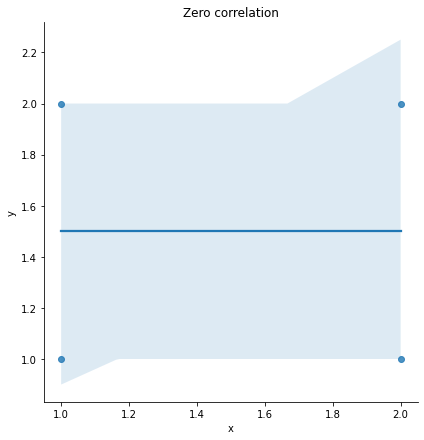

In [157]:
sns.lmplot(x="x",y="y",data=zero_df,height=6,aspect=1)
plt.title("Zero correlation")

In [160]:
zero_df.corr()

,x,y
x,1.0,0.0
y,0.0,1.0


## Correlation Heatmap using the dating data

In [161]:
dating_data=df2[["gender",'shopping', 'gaming', 'concerts', 'music']]

In [162]:
dating_data

,gender,shopping,gaming,concerts,music
0,0,8.0,1.0,10.0,9.0
1,0,8.0,1.0,10.0,9.0
2,0,8.0,1.0,10.0,9.0
3,0,8.0,1.0,10.0,9.0
4,0,8.0,1.0,10.0,9.0
...,...,...,...,...,...
8373,1,7.0,1.0,10.0,10.0
8374,1,7.0,1.0,10.0,10.0
8375,1,7.0,1.0,10.0,10.0
8376,1,7.0,1.0,10.0,10.0


In [163]:
corr_df=dating_data.corr()

In [165]:
corr_df

,gender,shopping,gaming,concerts,music
gender,1.000000,-0.330718,0.219619,-0.128339,-0.076850
shopping,-0.330718,1.000000,0.093467,0.205389,0.208329
gaming,0.219619,0.093467,1.000000,0.098806,0.043301
concerts,-0.128339,0.205389,0.098806,1.000000,0.655728
music,-0.076850,0.208329,0.043301,0.655728,1.000000


Text(0.5, 1.0, 'Correlation between different variabels freom the dating data set')

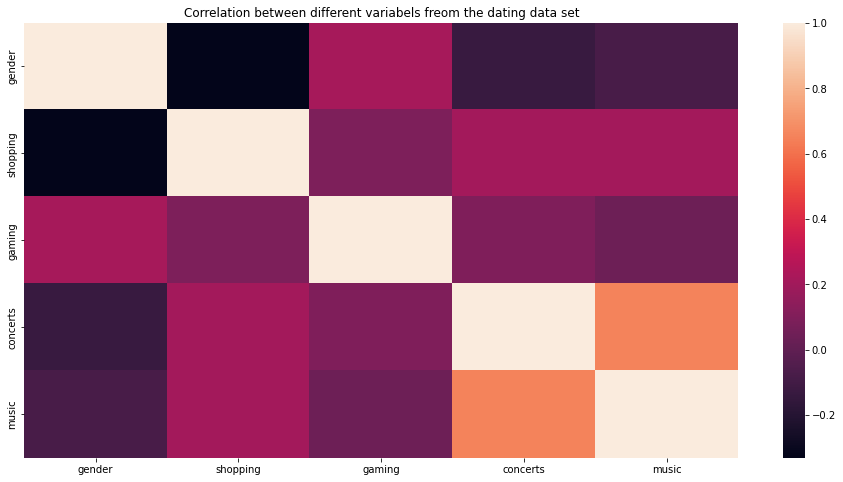

In [167]:
# Setting the figure size
plt.figure(figsize=(16,8))
sns.heatmap(corr_df)
plt.title("Correlation between different variabels freom the dating data set")

### Make the map more intuitive

* Set the minimum value for the color scale at -1
* Make your heatmap more visually pleasing : https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/
* Annotate values

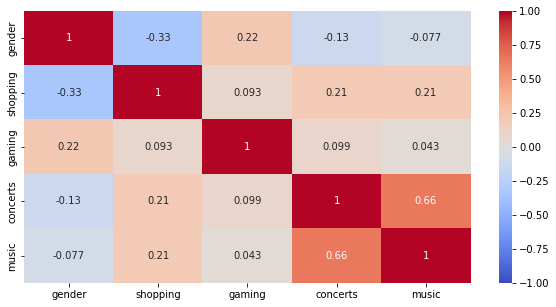

In [169]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df,vmin=-1,cmap="coolwarm",annot=True)

# Two-way plots

In [170]:
dating_data.head()

,gender,shopping,gaming,concerts,music
0,0,8.0,1.0,10.0,9.0
1,0,8.0,1.0,10.0,9.0
2,0,8.0,1.0,10.0,9.0
3,0,8.0,1.0,10.0,9.0
4,0,8.0,1.0,10.0,9.0


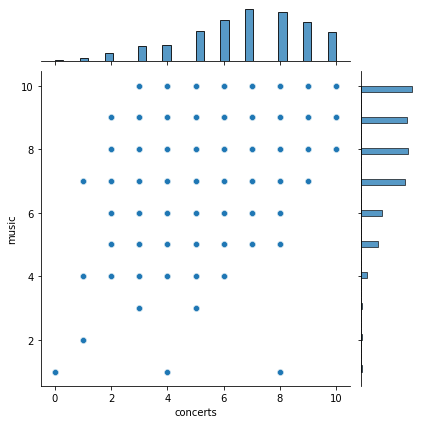

In [172]:
sns.jointplot(x='concerts', y='music', data=dating_data)